In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv(r'C:\Users\DAVID\Downloads\mushrooms.csv')

In [3]:
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [3]:
df.shape

(8124, 23)

In [4]:
for column in df.columns:
    print("Unique values in ",column," is",df[column].unique())

Unique values in  class  is ['p' 'e']
Unique values in  cap-shape  is ['x' 'b' 's' 'f' 'k' 'c']
Unique values in  cap-surface  is ['s' 'y' 'f' 'g']
Unique values in  cap-color  is ['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
Unique values in  bruises  is ['t' 'f']
Unique values in  odor  is ['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
Unique values in  gill-attachment  is ['f' 'a']
Unique values in  gill-spacing  is ['c' 'w']
Unique values in  gill-size  is ['n' 'b']
Unique values in  gill-color  is ['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
Unique values in  stalk-shape  is ['e' 't']
Unique values in  stalk-root  is ['e' 'c' 'b' 'r' '?']
Unique values in  stalk-surface-above-ring  is ['s' 'f' 'k' 'y']
Unique values in  stalk-surface-below-ring  is ['s' 'f' 'y' 'k']
Unique values in  stalk-color-above-ring  is ['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']
Unique values in  stalk-color-below-ring  is ['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c']
Unique values in  veil-type  is ['p']
Unique values in  veil

In [5]:
# As per class is the target
y = df['class']
y[y=='p'] = 0
y[y=='e'] = 1
y = y.astype(np.uint8)

In [6]:
X = df.drop('class', axis=1)
X.columns

Index(['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [7]:
X_encoded = pd.get_dummies(X)
X_encoded.head()

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y,
                                                    test_size=0.3,
                                                    random_state=42)

In [9]:
dt = DecisionTreeClassifier()
dt = dt.fit(X_train, y_train)

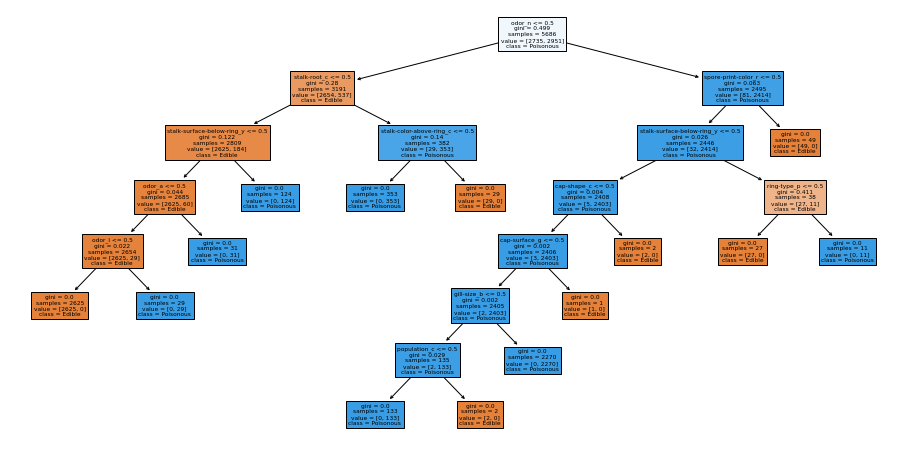

In [25]:
plt.figure(figsize=(16,8))
plot_tree(dt,
          filled=True,
          class_names=['Edible', 'Poisonous'],
          feature_names=X_encoded.columns);

In [26]:
scores = cross_val_score(dt,X_train,y_train,cv=5)

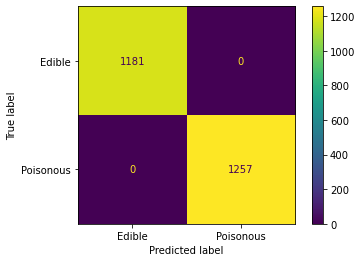

In [28]:
plot_confusion_matrix(dt,X_test,y_test,display_labels=['Edible','Poisonous'])

In [10]:
prediction = dt.predict(X_test)

In [11]:
score = accuracy_score(prediction,y_test)

In [12]:
print(score)

1.0
